# CASE STUDY
## VISUALIZATIONS IN PYTHON ON SALES DATA 

#### The objective of this dashboard is to understand sales trends for one of the leading pharmaceutical company.
#### The client would like to come see a dynamic dashboard with different KPI's at different levels (National, Region & Territory etc). Create the below charts as these would help us explore the past data in a better manner and give a good picture of the progress and failures. This in turn would catalyse the decision-making process, making it easier, simpler and accurate.

#### Import necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats

#### Import Data File

In [2]:
sales_data = pd.read_csv("D:\Python\Python Foundation Case Study 4 - Python Visualization Case Study\SalesData.csv")
sales_data.head(2)

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31


In [3]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3709 entries, 0 to 3708
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   AccountId           3709 non-null   int64  
 1   AccountName         3709 non-null   object 
 2   Region              3709 non-null   object 
 3   Division            3709 non-null   object 
 4   City                3709 non-null   object 
 5   State               3709 non-null   object 
 6   Tier                3709 non-null   object 
 7   Month               3709 non-null   object 
 8   Sales2015           3709 non-null   float64
 9   Sales2016           3709 non-null   float64
 10  Units2015           3709 non-null   float64
 11  Units2016           3709 non-null   float64
 12  TargetAchevied2015  3709 non-null   float64
 13  TargetAchevied2016  3709 non-null   float64
dtypes: float64(6), int64(1), object(7)
memory usage: 405.8+ KB


### 1. Compare Sales by region for 2016 with 2015 using bar chart

In [4]:
sales_by_region = sales_data.groupby("Region")[["Sales2015","Sales2016"]].sum()
sales_by_region

,Sales2015,Sales2016
Region,,
Central,7.891729e+06,9.787809e+06
East,9.512916e+06,1.266723e+07
West,5.349745e+06,7.209689e+06


<AxesSubplot:ylabel='count'>

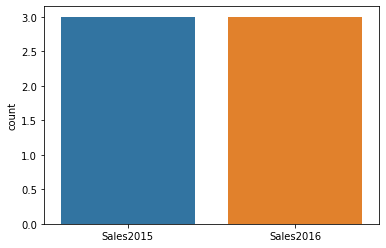

In [7]:
sns.countplot(data=sales_by_region)

<AxesSubplot:title={'center':'Sales by region for 2016 with 2015'}, xlabel='Region'>

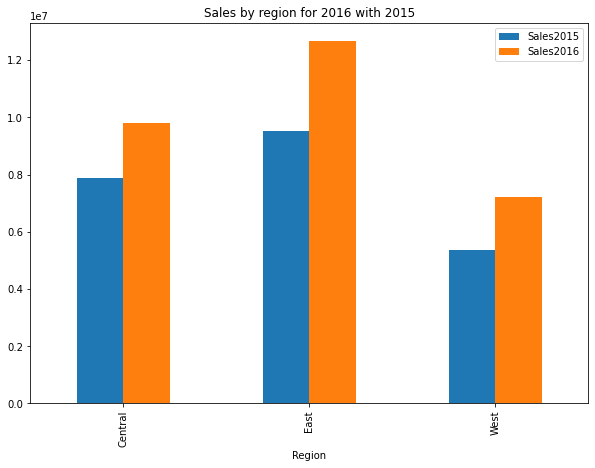

In [8]:
sales_by_region.plot(kind='bar',figsize=(10,7),title='Sales by region for 2016 with 2015')


##### We can concluded that sales in 2016 is more in every region as compare to the 2015.
##### East region has contributed maximum in both year i.e.2015 and 2016. 

### 2. What are the contributing factors to the sales for each region in 2016. Visualize it using a Pie Chart.

In [9]:
cont_pie=sales_data.groupby("Region")["Sales2016"].sum()
cont_pie

Region
Central    9.787809e+06
East       1.266723e+07
West       7.209689e+06
Name: Sales2016, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

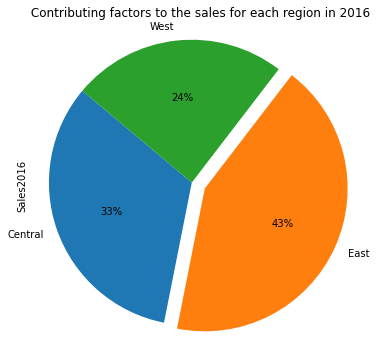

In [10]:
cont_pie.plot(kind="pie",autopct="%1.0f%%",figsize=(6,6),labels=["Central","East","West"],explode=[0.0,0.1,0.0],rot=4,
             title=" Contributing factors to the sales for each region in 2016",startangle=140)
plt.axis('equal')
plt.show

#### The east region contribute maximum sales in 2016.

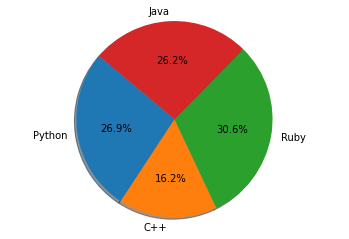

In [11]:
labels = ['Python', 'C++', 'Ruby', 'Java']
sizes = [215, 130, 245, 210]
# Plot
plt.pie(sizes, labels=labels, 
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

### 3. Compare the total sales of 2015 and 2016 with respect to Region and Tiers

In [12]:
sales_reg_tier=(sales_data.groupby(["Region","Tier"])[["Sales2015","Sales2016"]].sum())
sales_reg_tier
#sales_pivot=pd.pivot_table(data=sales_reg_tier,index=['Region','Tier'])
#sales_pivot

Sales2015     Sales2016
Region  Tier                            
Central High  4.798698e+06  6.026043e+06
        Low   9.434397e+05  1.132833e+06
        Med   2.068226e+06  2.632181e+06
        Out   8.136489e+04 -3.248530e+03
East    High  6.102946e+06  7.817151e+06
        Low   9.016658e+05  1.144930e+06
        Med   2.470998e+06  3.705150e+06
        Out   3.730655e+04  0.000000e+00
West    High  2.944789e+06  3.768038e+06
        Low   6.710644e+05  1.099502e+06
        Med   1.718476e+06  2.342149e+06
        Out   1.541508e+04  0.000000e+00

<function matplotlib.pyplot.show(close=None, block=None)>

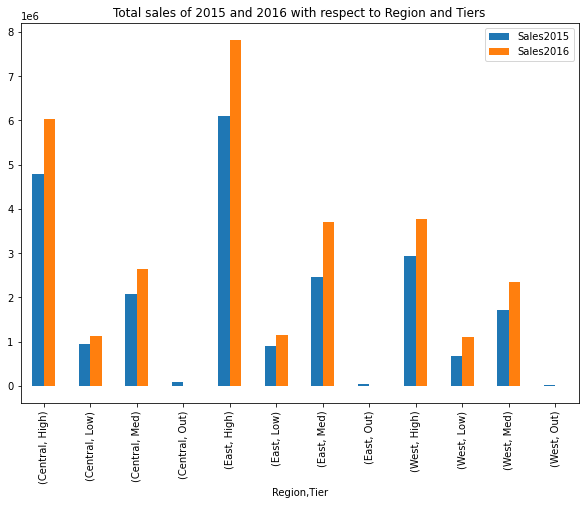

In [13]:
sales_reg_tier.plot(kind="bar",figsize=(10,7))
plt.ylabel=("Sales")
plt.title("Total sales of 2015 and 2016 with respect to Region and Tiers")
plt.show

### 4. In East region, which state registered a decline in 2016 as compared to 2015?

In [14]:
sales_data.head()

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53


In [15]:
sales_by_state = sales_data.groupby(['Region',"State"])[['Sales2015','Sales2016']].sum()
sales_by_state

Sales2015     Sales2016
Region  State                            
Central AL     5.091037e+05  5.958284e+05
        AR     2.133175e+05  2.276081e+05
        IL     6.217938e+05  7.843073e+05
        IN     3.166781e+05  5.996723e+05
        KY     5.312149e+05  6.332189e+05
        LA     4.793662e+05  6.803033e+05
        MI     5.686517e+05  7.072480e+05
        MS     3.045782e+05  2.204109e+05
        OH     9.276875e+05  1.221085e+06
        OK     2.484607e+05  3.396445e+05
        PA     3.002670e+05  2.877924e+05
        TN     4.370386e+05  5.522301e+05
        TX     1.712440e+06  2.013116e+06
        WI     3.044250e+05  4.403802e+05
        WV     4.167062e+05  4.849640e+05
East    CT     1.972028e+05  3.235023e+05
        DC     2.167240e+05  2.574217e+05
        FL     1.660162e+06  2.508232e+06
        GA     6.815465e+05  9.469198e+05
        MA     4.192788e+05  6.870964e+05
        MD     5.273091e+05  7.500088e+05
        ME     7.742564e+04  1.836730e+05
        NC     1.292802e+06  1.610521e+06
        NH     1.364194e+05  1.447175e+05
        NJ     5.204193e+05  7.822892e+05
        NY     1.725415e+06  1.703136e+06
        PA     7.850928e+05  8.943195e+05
        RI     1.563118e+05  1.624546e+05
        SC     2.478118e+05  4.634141e+05
        TN     4.967700e+04  7.010941e+04
        VA     8.193191e+05  1.179415e+06
West    AZ     3.889876e+05  5.195079e+05
        CA     1.891621e+06  2.396883e+06
        CO     4.023385e+05  5.046537e+05
        IA     1.022714e+05  1.461604e+05
        ID     9.237388e+04  1.157684e+05
        IL     9.375350e+04  1.224796e+05
        KS     2.284577e+05  2.850208e+05
        MN     3.142297e+05  3.220523e+05
        MO     4.444618e+05  7.241663e+05
        NE     6.981622e+04  8.587284e+04
        NM     8.828041e+04  1.325122e+05
        NV     2.057940e+05  2.814234e+05
        OR     2.629237e+05  4.383578e+05
        SD     7.549041e+04  1.662565e+05
        TX     2.530734e+05  3.495791e+05
        UT     1.133622e+05  1.732097e+05
        WA     3.225094e+05  4.457855e+05

In [16]:
sales_east = sales_by_state.loc["East"]
sales_east

,Sales2015,Sales2016
State,,
CT,197202.790,323502.31
DC,216723.950,257421.69
FL,1660162.000,2508232.28
GA,681546.460,946919.77
MA,419278.750,687096.45
MD,527309.060,750008.79
ME,77425.640,183673.05
NC,1292801.640,1610521.00
NH,136419.380,144717.51


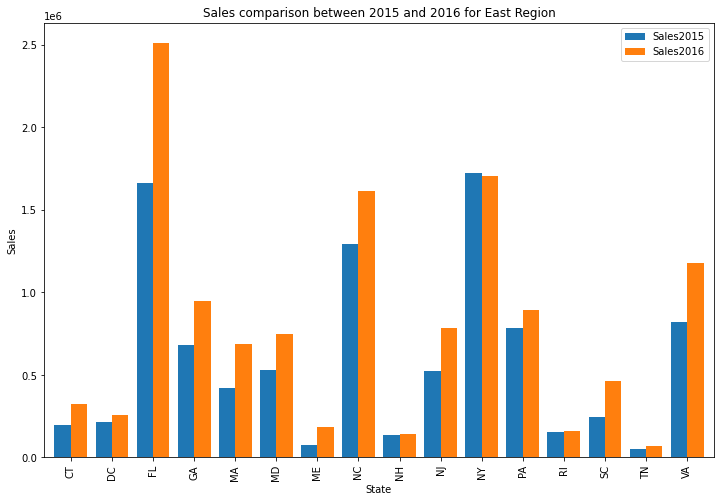

In [17]:
sales_east.plot(kind="bar",figsize=(12,8),width=0.8,ylabel="Sales")
plt.title("Sales comparison between 2015 and 2016 for East Region")
plt.show()

### 5. In all the High tier, which Division saw a decline in number of units sold in 2016 compared to 2015?

In [18]:
sales_data.head(1)

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.0,13208.52,0.0,4.0,0.7,1.53


In [19]:
division_units = sales_data.groupby(["Tier","Division"])[["Units2015",'Units2016']].sum()
division_units

Units2015  Units2016
Tier Division                           
High BIG APPLE       180.8330   231.0000
     CHARGERS        123.6666   164.4999
     CONGRESSIONAL   164.5003   205.0000
     DIAMONDBACK     153.3334   176.6667
     EMPIRE          414.3332   449.3332
...                       ...        ...
Out  SYNERGY           3.0000     0.0000
     THE CAROLINAS     2.0000     0.0000
     VICTORY           1.0000     0.0000
     WOLVERINE         1.0000     0.0000
     WRANGLER         13.0000     0.0000

[96 rows x 2 columns]

In [20]:
high_div_units = division_units.loc["High"]
high_div_units

,Units2015,Units2016
Division,,
BIG APPLE,180.8330,231.0000
CHARGERS,123.6666,164.4999
CONGRESSIONAL,164.5003,205.0000
DIAMONDBACK,153.3334,176.6667
EMPIRE,414.3332,449.3332
GRIDIRON,213.6673,246.1675
GULF STREAM,185.0000,301.0009
HAILSTORM,187.8338,247.0003
KINETIC,214.3334,244.5001


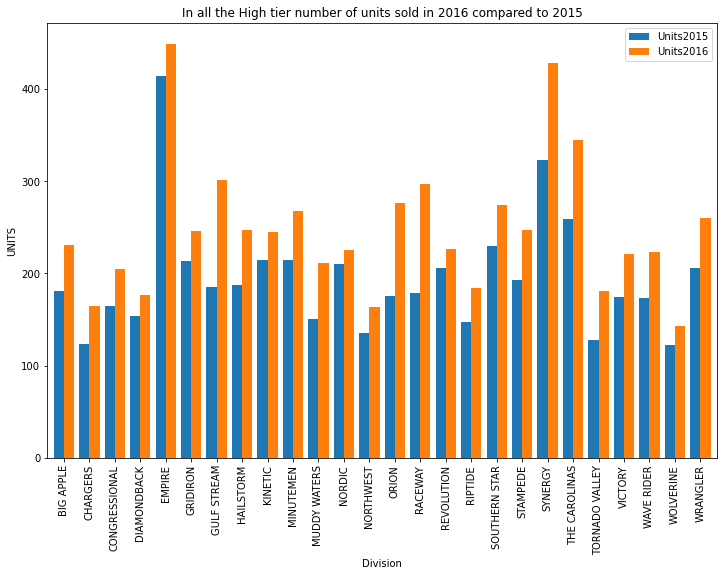

In [21]:
high_div_units.plot(kind="bar",figsize=(12,8),width=0.8,ylabel="UNITS")
plt.title("In all the High tier number of units sold in 2016 compared to 2015")
plt.show()

##### No Division Shows Decline in Units Sold in 2016 as Compare to 2015. 

### 6. Create a new column Qtr using numpy.where() or any suitable utility in the imported dataset. The Quarters are based on months and defined as -
### • Jan - Mar : Q1
### • Apr - Jun : Q2
### • Jul - Sep : Q3
### • Oct - Dec : Q4

In [22]:
sales_data["Qtr"]=np.where((((sales_data.Month=='Jan')|(sales_data.Month=='Feb') |(sales_data.Month=='Mar'))),'Q1',
                           (np.where((((sales_data.Month=='Apr')|(sales_data.Month=='May') |(sales_data.Month=='Jun'))),'Q2',
                                    (np.where((((sales_data.Month=='Jul')|(sales_data.Month=='Aug') |(sales_data.Month=='Sep'))),'Q3',
                                             (np.where((((sales_data.Month=='Oct')|(sales_data.Month=='Nov') |(sales_data.Month=='Dec'))),'Q4',0)))))))

In [23]:
sales_data.head(20)

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016,Qtr
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53,Q3
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31,Q4
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29,Q2
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17,Q1
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53,Q3
5,2400,Account4,East,MINUTEMEN,PORTLAND,ME,High,Jul,0.00,10525.24,0.0,4.0,1.03,1.45,Q3
6,2400,Account4,East,MINUTEMEN,PORTLAND,ME,High,Feb,2631.31,42812.62,1.0,17.0,1.08,0.99,Q1
7,2404,Account5,East,EMPIRE,BRIDGEPORT,CT,Low,Mar,4153.89,3918.77,1.0,1.0,0.79,1.46,Q1
8,2406,Account6,East,BIG APPLE,JERSEY CITY,NJ,Med,Mar,0.00,6951.86,0.0,2.0,1.12,1.02,Q1
9,2408,Account7,East,BIG APPLE,JERSEY CITY,NJ,High,Aug,0.00,10994.54,0.0,4.0,1.11,1.54,Q3


### 7. Compare Qtr wise sales in 2015 and 2016 in a bar plot.

In [24]:
Qtr_sales=sales_data.groupby("Qtr")[["Sales2015","Sales2016"]].sum()

In [25]:
Qtr_sales

,Sales2015,Sales2016
Qtr,,
Q1,5.485800e+06,6.997953e+06
Q2,5.390862e+06,7.237361e+06
Q3,6.164094e+06,7.861546e+06
Q4,5.713634e+06,7.567868e+06


<AxesSubplot:title={'center':' Qtr wise sales in 2015 and 2016 '}, xlabel='Qtr', ylabel='Sales'>

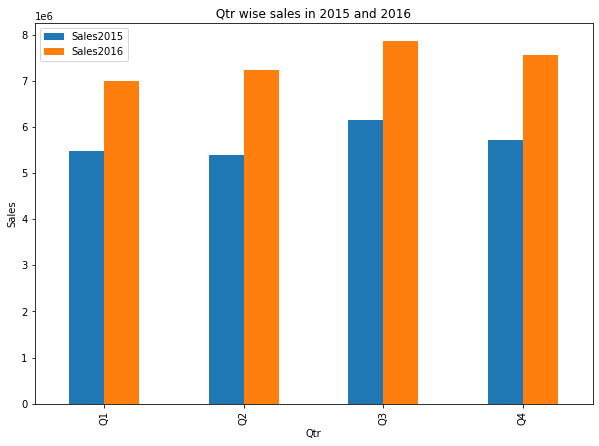

In [26]:
Qtr_sales.plot(kind="bar",ylabel="Sales",figsize=(10,7),title=" Qtr wise sales in 2015 and 2016 ")

### 8. Determine the composition of Qtr wise sales in and 2016 with regards to all the Tiers in a pie chart. (Draw 4 pie charts representing a Quarter for each Tier)

In [27]:
sales_data.head(2)

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016,Qtr
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53,Q3
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31,Q4


In [28]:
sales_data["Total_Sales"]=sales_data["Sales2015"]+sales_data["Sales2016"]
sales_data.head()

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016,Qtr,Total_Sales
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53,Q3,13208.52
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31,Q4,33615.69
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29,Q2,6627.00
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17,Q1,33135.00
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53,Q3,3684.48


In [29]:
Qtr_pie=sales_data.groupby(["Qtr","Tier"])[["Total_Sales"]].sum()

In [30]:
Qtr_pie

Total_Sales
Qtr Tier              
Q1  High  7.178529e+06
    Low   1.649140e+06
    Med   3.644139e+06
    Out   1.194558e+04
Q2  High  7.289102e+06
    Low   1.603291e+06
    Med   3.704192e+06
    Out   3.163875e+04
Q3  High  8.793315e+06
    Low   1.368967e+06
    Med   3.814496e+06
    Out   4.886189e+04
Q4  High  8.196721e+06
    Low   1.272036e+06
    Med   3.774353e+06
    Out   3.839177e+04

In [31]:
Qtr_pivot=Qtr_pie.pivot_table(index="Tier",columns="Qtr",values=["Total_Sales"])

In [32]:
Qtr_pivot

Total_Sales                                          
Qtr             Q1            Q2            Q3            Q4
Tier                                                        
High  7.178529e+06  7.289102e+06  8.793315e+06  8.196721e+06
Low   1.649140e+06  1.603291e+06  1.368967e+06  1.272036e+06
Med   3.644139e+06  3.704192e+06  3.814496e+06  3.774353e+06
Out   1.194558e+04  3.163875e+04  4.886189e+04  3.839177e+04

<function matplotlib.pyplot.show(close=None, block=None)>

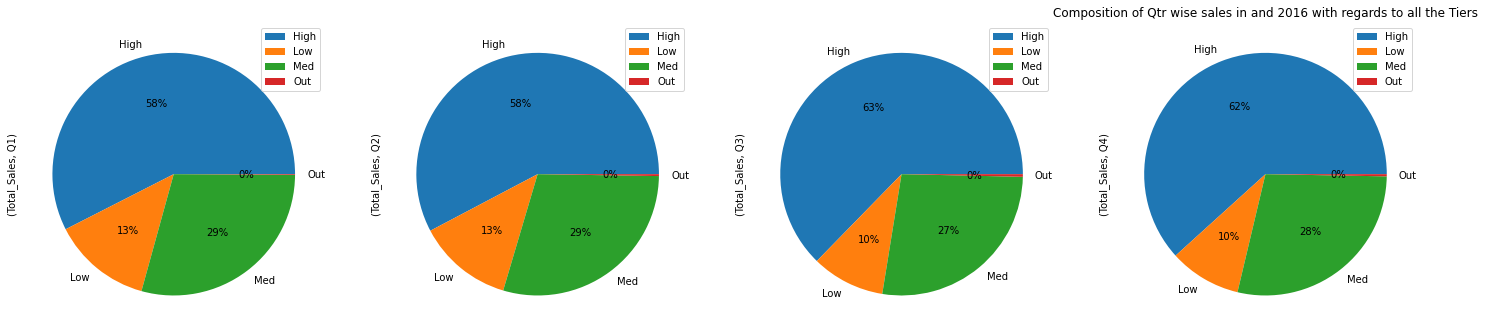

In [33]:
Qtr_pivot.plot(kind="pie",figsize=(25,20),subplots=True,autopct="%1.0f%%")
plt.title("Composition of Qtr wise sales in and 2016 with regards to all the Tiers")
plt.show